## Reinforcement Learning with a Q-learning agent

### Components of RL

Every RL problem consists of:

1. Agent 🏃

The entity that makes decisions (e.g., a robot, a game character).

2. Environment 🌍

The world the agent interacts with (e.g., a maze, a video game).

3. State (S) 📍

A representation of the current situation (e.g., a robot's position (x, y)).

4. Actions (A) 🎮

The choices available to the agent (e.g., move up, down, left, right).

5. Reward (R) 💰

A score given to the agent based on its action.

6. Policy (π) 📜

A strategy that tells the agent what action to take in each state. The policy is what the agent learns over time.

We’ll create a 5x5 grid where the agent moves up, down, left, or right to reach a goal.

### Environment Setup
The agent starts at (0,0).

The goal is at (4,4).

The agent gets:

✅ +10 reward for reaching the goal.

❌ -1 penalty for every move (to encourage shortest path).

❌ -10 penalty for hitting walls.

The agent will learn by trial and error using Q-learning.

In [1]:
import numpy as np
import random

class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)  # Start position
        self.goal = (size-1, size-1)  # Goal position

    def reset(self):
        self.state = (0, 0)  # Reset to start position
        return self.state
    
    def validate_state(self, x, y):
        """ Ensure the agent stays inside the grid. """
        x = max(0, min(x, self.size - 1))
        y = max(0, min(y, self.size - 1))
        return x, y

    def step(self, action):
        x, y = self.state
        
        # Actions: 0 = up, 1 = down, 2 = left, 3 = right
        if action == 0:
            x -= 1  # Move up
        elif action == 1:
            x += 1  # Move down
        elif action == 2:
            y -= 1  # Move left
        elif action == 3:
            y += 1  # Move right

        # Update state
        new_x, new_y = self.validate_state(x, y)
        self.state = (new_x, new_y)

        # If the move was invalid (agent tried to move out of bounds)
        hit_wall = (x != new_x or y != new_y)

        # Reward system
        if self.state == self.goal:
            return self.state, 10, True  # Goal reached
        elif hit_wall:
            return self.state, -10, False  # Wall was hit
        else:
            return self.state, -1, False  # Small penalty for each move


## Q-Learning Formula (Bellman equation)
$$
Q(S, A) = Q(S, A) + \alpha \left[ R + \gamma \max Q(S', A') - Q(S, A) \right]
$$

Where:

$$
Q(S, A)
$$
Current Q-value of action A in state S.

$$
R
$$
Reward received after taking action A.

$$
\gamma (gamma)
$$ 
Discount factor (importance of future rewards).

$$
\alpha (alpha)
$$
Learning rate (how much to update Q-values).

$$
\max Q(S', A')
$$
Best future reward from the next state.

In [2]:
class QLearningAgent:
    def __init__(self, grid_size=5, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995):
        self.grid_size = grid_size
        self.alpha = alpha      # Learning rate
        self.gamma = gamma      # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_min = epsilon_min  # Minimum exploration rate
        self.epsilon_decay = epsilon_decay  # Decay rate for exploration
        
        # Initialize Q-table (5x5 grid, 4 actions)
        self.q_table = np.zeros((grid_size, grid_size, 4))

    def decay_epsilon(self):
        """ Decrease epsilon over time """
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def choose_action(self, state):
        x, y = state

        # Decaying ε-greedy strategy
        if np.random.rand() < self.epsilon:
            return np.random.choice(4)  # Explore (random action)
        else:
            return np.argmax(self.q_table[x, y])  # Exploit (best action)

    def update_q_value(self, state, action, reward, next_state):
        x, y = state
        nx, ny = next_state

        # Bellman equation update
        best_future_q = np.max(self.q_table[nx, ny])
        self.q_table[x, y, action] += self.alpha * (reward + self.gamma * best_future_q - self.q_table[x, y, action])


Let's train the agent for 1000 episodes:

In [3]:
env = GridWorld()
agent = QLearningAgent()

episodes = 1000
rewards = []

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = agent.choose_action(state)  # Pick action
        next_state, reward, done = env.step(action)  # Take action
        total_reward += reward
        agent.update_q_value(state, action, reward, next_state)  # Learn
        state = next_state  # Move to next state

    agent.decay_epsilon()
    rewards.append(total_reward)
    
    if episode % 50 == 0:
        print(f"Episode {episode} complete")


Episode 0 complete
Episode 50 complete
Episode 100 complete
Episode 150 complete
Episode 200 complete
Episode 250 complete
Episode 300 complete
Episode 350 complete
Episode 400 complete
Episode 450 complete
Episode 500 complete
Episode 550 complete
Episode 600 complete
Episode 650 complete
Episode 700 complete
Episode 750 complete
Episode 800 complete
Episode 850 complete
Episode 900 complete
Episode 950 complete


Visualize how the agent's policy works

In [4]:
actions = ["↑", "↓", "←", "→"]
policy_grid = np.empty((5,5), dtype=str)

for i in range(5):
    for j in range(5):
        best_action = np.argmax(agent.q_table[i, j])
        policy_grid[i, j] = actions[best_action]

policy_grid[4, 4] = "🏆"  # Mark goal position
print(policy_grid)


[['→' '↓' '↓' '↓' '↓']
 ['→' '→' '↓' '↓' '↓']
 ['→' '→' '→' '↓' '↓']
 ['→' '→' '→' '↓' '↓']
 ['→' '→' '→' '→' '🏆']]


In [ ]:
import matplotlib.pyplot as plt

# Run one last episode to track the path
state = env.reset()
done = False
path = [state]  # Track positions

while not done:
    action = agent.choose_action(state)
    state, reward, done = env.step(action)
    path.append(state)  # Store position

# Convert path to a grid representation
grid = np.full((env.size, env.size), "⬜")  # Empty cells

# Mark the path
for (x, y) in path:
    grid[x, y] = "👣"  # Dots for movement

# Mark start and goal
grid[path[0]] = "🔴"  # Start position
grid[path[-1]] = "🏆"  # Goal position

# Print the final path grid
for row in grid:
    print(" ".join(row))


🔴 👣 ⬜ ⬜ ⬜
⬜ 👣 👣 ⬜ ⬜
⬜ ⬜ 👣 👣 ⬜
⬜ ⬜ ⬜ 👣 ⬜
⬜ ⬜ ⬜ 👣 🏆


In [12]:
godot_path = f"var path = [{', '.join([f'Vector2({x}, {y})' for x, y in path])}]"
print(godot_path)

var path = [Vector2(0, 0), Vector2(0, 1), Vector2(1, 1), Vector2(1, 2), Vector2(2, 2), Vector2(2, 3), Vector2(3, 3), Vector2(4, 3), Vector2(4, 4)]


Plot how total rewards were changing during the training

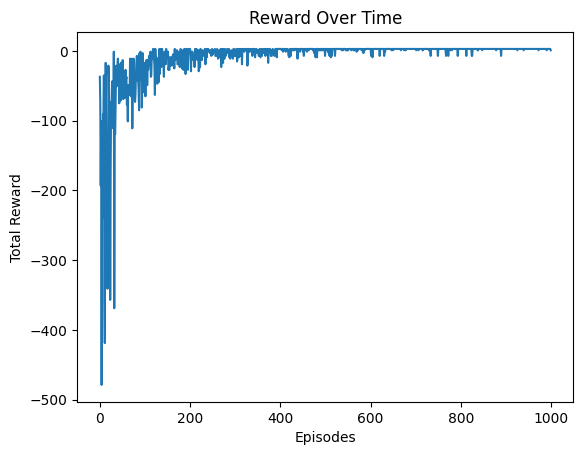

In [6]:
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Reward Over Time")
plt.show()

Smooth to see better

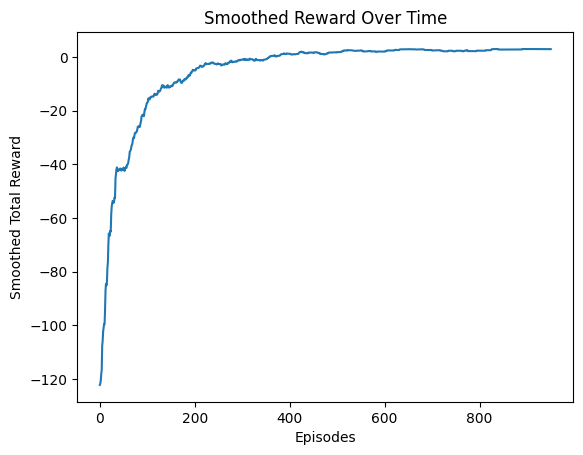

In [7]:
def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode="valid")

smoothed_rewards = moving_average(rewards, window_size=50)

plt.plot(range(len(smoothed_rewards)), smoothed_rewards)
plt.xlabel("Episodes")
plt.ylabel("Smoothed Total Reward")
plt.title("Smoothed Reward Over Time")
plt.show()


In [75]:
import json

# Save to JSON
with open("policy.json", "w") as f:
    json.dump(policy_grid.tolist(), f)

print("Policy saved!")

Policy saved!


In [ ]:
import json

# Store the last path
last_moves = []

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    episode_moves = []  # Record this episode's moves

    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.update_q_value(state, action, reward, next_state)
        
        episode_moves.append(action)  # Save action
        state = next_state
        total_reward += reward

    if episode == episodes - 1:  # Save only the last episode
        last_moves = episode_moves

# Convert actions to symbols (↑, ↓, ←, →)
action_map = {0: "↑", 1: "↓", 2: "←", 3: "→"}
last_moves = [action_map[a] for a in last_moves]

# Save the last path to JSON
with open("last_moves.json", "w") as f:
    json.dump(last_moves, f)
